In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [33]:
results_folder = './results/'
results_files = [
    'l1-fanout-qtrain_qtest_True',
    'l1-fanout_qtest_True',
    'weightscale_qtest_True',
    'nopenalty_qtest_True'
]

coefficients = {}
activities = {}
accuracies = {}

for name in results_files:
    f = np.loadtxt(os.path.join(results_folder, name + '.txt'))
    coefficients[name], activities[name], accuracies[name] = f.T

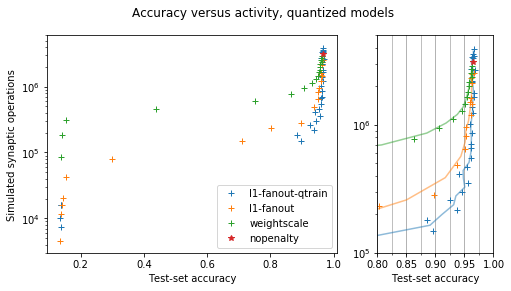

In [65]:
def smooth(series):
    return (series[1:] + series[:-1]) / 2.

fig, ax = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios': [2.5, 1]})
for i, name in enumerate(results_files[:3]):  # exclude nopenalty
    # First plot
    ax[0].plot(accuracies[name], activities[name], '+',
             label=name.split('_qtest_True')[0])
    # Second plot
    act, acc = smooth(activities[name]), smooth(accuracies[name])
    ax[1].plot(accuracies[name], activities[name],
             '+', label=name, c=f"C{i}")
    ax[1].plot(acc, act, alpha=0.5, c=f"C{i}")
    
# Plot nopenalty (single point)
ax[0].plot(accuracies['nopenalty_qtest_True'],
           activities['nopenalty_qtest_True'],
           '*', label='nopenalty', c='C3')
ax[1].plot(accuracies['nopenalty_qtest_True'],
           activities['nopenalty_qtest_True'], '*', c='C3')
    
ax[0].set_yscale('log')
ax[0].set_ylim([3e3, 6e6])
ax[0].legend(loc=4)
ax[0].set_xlabel("Test-set accuracy")
ax[0].set_ylabel("Simulated synaptic operations")

ax[1].set_yscale('log')
ax[1].set_ylim([1e5, 5e6])
ax[1].set_xlim([0.8, 1.0])
ax[1].set_xticks(np.arange(0.8, 1.05, 0.05))
ax[1].set_xticks(np.arange(0.8, 1.0, 0.025), minor=True)
ax[1].grid(axis='x', markevery=0.01, which='both')
ax[1].set_xlabel("Test-set accuracy")


# fig.tight_layout()
fig.suptitle("Accuracy versus activity, quantized models");
fig.savefig("act-acc.png")

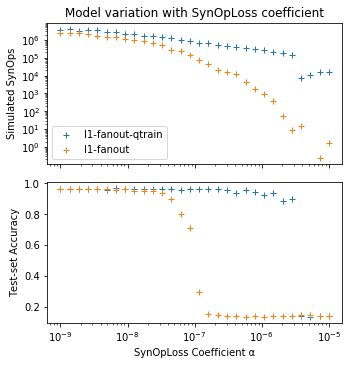

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(5,5), sharex=True)
for name in results_files[:2]:  # ignore weight scaling and nopenalty
    ax[0].plot(coefficients[name], activities[name], '+',
               label=name.split('_qtest_True')[0])
    ax[1].plot(coefficients[name], accuracies[name], '+')
    
ax[0].set_yscale('log')
ax[0].set_ylabel('Simulated SynOps')
ax[1].set_xlabel('SynOpLoss Coefficient α')
ax[1].set_ylabel('Test-set Accuracy')
ax[1].set_xscale('log')
ax[0].legend()

fig.tight_layout()
ax[0].set_title("Model variation with SynOpLoss coefficient")

fig.savefig("alpha.png")